# Customer Spending

This Data Science Project predicts customer spending rating on a scale of 1 to 100 based on a number of factors such as age, gender, career, income etc.

From this model a shopkeeper can tell long term and short term customers given the information on how frequent they buy from the shop.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
# load the dataset
dataset = pd.read_csv("Customers.csv")
df = pd.DataFrame(dataset)
df

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
0,1,Male,19,15000,Healthcare,1,4,39
1,2,Male,21,35000,Engineer,3,3,81
2,3,Female,20,86000,Engineer,1,1,6
3,4,Female,23,59000,Lawyer,0,2,77
4,5,Female,31,38000,Entertainment,2,6,40
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,Artist,8,7,40
1996,1997,Female,91,73158,Doctor,7,7,32
1997,1998,Male,87,90961,Healthcare,9,2,14
1998,1999,Male,77,182109,Executive,7,2,4


## Preparing and Exploring Data 

In [4]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1], "\n")
print("Subset of the dataset: \n", df.head(), "\n")

Rows:  2000
Columns:  8 

Subset of the dataset: 
    CustomerID  Gender  Age  Annual Income ($)     Profession  Work Experience  \
0           1    Male   19              15000     Healthcare                1   
1           2    Male   21              35000       Engineer                3   
2           3  Female   20              86000       Engineer                1   
3           4  Female   23              59000         Lawyer                0   
4           5  Female   31              38000  Entertainment                2   

   Family Size  Spending Score (1-100)  
0            4                      39  
1            3                      81  
2            1                       6  
3            2                      77  
4            6                      40   



In [5]:
df.describe()

,CustomerID,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,4.102500,3.768500,50.962500
std,577.494589,28.429747,45739.536688,3.922204,1.970749,27.934661
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,500.750000,25.000000,74572.000000,1.000000,2.000000,28.000000
50%,1000.500000,48.000000,110045.000000,3.000000,4.000000,50.000000
75%,1500.250000,73.000000,149092.750000,7.000000,5.000000,75.000000
max,2000.000000,99.000000,189974.000000,17.000000,9.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
 7   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [7]:
# fill missing values
train_mode = dict(df.mode().iloc[0])
df = df.fillna(train_mode)
print(train_mode)

{'CustomerID': 1, 'Gender': 'Female', 'Age': 31.0, 'Annual Income ($)': 9000.0, 'Profession': 'Artist', 'Work Experience': 1.0, 'Family Size': 2.0, 'Spending Score (1-100)': 49.0}


In [9]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Profession                0
Work Experience           0
Family Size               0
Spending Score (1-100)    0
dtype: int64


## Saving Figures as png Images
Below is an extra code that will save plot figures as png image files

In [16]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Check for Duplicate Values

In [12]:
print(df.duplicated().any())
duplicated_data = df.duplicated()
print("Number of duplicated data: ", duplicated_data[duplicated_data == True].size)

False
Number of duplicated data:  0


### Correlation

Correlation
Spending Score (1-100)    1.000000
Annual Income ($)         0.023299
CustomerID                0.018936
Family Size               0.002232
Work Experience          -0.028948
Age                      -0.041798
Name: Spending Score (1-100), dtype: float64


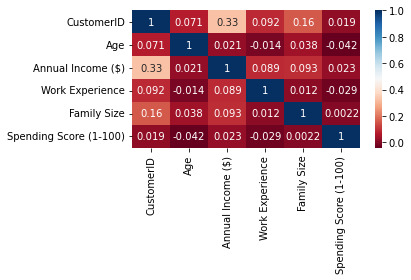

In [17]:
# check for correlation
import seaborn as sns

print("Correlation")
print(df.corr()["Spending Score (1-100)"].sort_values(ascending=False))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
save_fig("correlation")
plt.show()

### Data Visualization

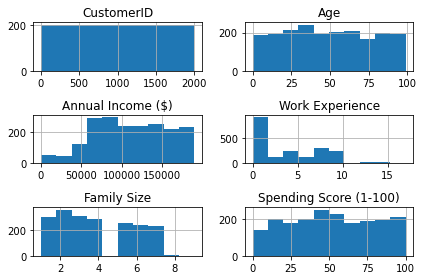

In [18]:
# Plot a histogram to visualize the dataset
df.hist()
save_fig("customers_data_visualization")
plt.show()

from the histograms above, work experience is positively skewed evident by tail on the right side of the distribution, family size is bimodal, as shown with two distict peaks while spending score and annual income are random due to no presence of any informative pattern.

In [21]:
# convert categoricals
encoders = {}
for column in ["Gender", "Profession"]:
    categorical_convert = LabelEncoder()
    df[column] = categorical_convert.fit_transform(df[column])
    encoders[column] = categorical_convert